In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from IPython.display import display
from HelperFunctions import *
from wordcloud import WordCloud as wc
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = [20,10]

In [2]:
with open('kiss.json', "r") as read_file:
    lyrics = json.load(read_file)

In [3]:
spotify_df = pd.read_csv('../spotify/kiss_spotify.csv')

In [4]:
extracts = ["album.name", "release_date"]
albums = pd.json_normalize(lyrics["songs"])

In [5]:
lyrics_df = pd.DataFrame(lyrics['songs'])[['title','lyrics']]

In [6]:
lyrics_df.insert(0,'album',albums[extracts][['album.name']])
lyrics_df.insert(1,'release_date',albums[extracts][['release_date']])

In [7]:
lyrics_df.sort_values(by=['release_date'], inplace=True, ignore_index=True)

In [8]:
toDrop = ['Kiss Symphony- Alive IV (2-Disc Edition)','Kiss Unplugged','Alive III','Music From "The Elder" (Remastered Version)',\
         'Alive II','Love Gun (Deluxe Edition)', 'Alive! ','Destroyer (Resurrected)',\
         'The KISS Box Set','Double Platinum','Killers ','Smashes, Thrashes & Hits','Kiss 40','Greatest Kiss',\
         'We’re a Happy Family: A Tribute to Ramones','Alive! The Millennium Concert','The Art of McCartney',\
         'Chikara','Psycho Circus (CD single)','You Wanted the Best, You Got the Best!!',\
         '20th Century Masters - The Millennium Collection: The Best of Kiss','Ikons','Kiss Symphony- Alive IV (1-Disc Edition)',\
         'Stars','']
for item in toDrop:
    dropIndicies = lyrics_df[(lyrics_df['album'] == item)].index
    lyrics_df.drop(dropIndicies , inplace=True)
    
lyrics_df.dropna(subset=['album'],inplace=True)
lyrics_df.drop(lyrics_df[lyrics_df['lyrics'] == ''].index, inplace = True)

In [9]:
lyrics_df

album release_date  \
0                                    Kiss    1974-02-18   
1                                    Kiss    1974-02-18   
3                                    Kiss    1974-02-18   
4                                    Kiss    1974-02-18   
6                                    Kiss    1974-02-18   
7                                    Kiss    1974-02-18   
8                                    Kiss    1974-02-18   
9                                    Kiss    1974-05-10   
10                                   Kiss    1974-08-10   
12                        Hotter Than Hell   1974-10-22   
13                        Hotter Than Hell   1974-10-22   
14                        Hotter Than Hell   1974-10-22   
15                        Hotter Than Hell   1974-10-22   
16                        Hotter Than Hell   1974-10-22   
17                        Hotter Than Hell   1974-10-22   
18                        Hotter Than Hell   1974-10-22   
19                        Hotter Than Hell   1974-10-22   
20                        Hotter Than Hell   1974-10-22   
21                        Hotter Than Hell   1974-10-22   
22                         Dressed to Kill   1975-03-19   
23                         Dressed to Kill   1975-03-19   
24                         Dressed to Kill   1975-03-19   
25                         Dressed to Kill   1975-03-19   
26                         Dressed to Kill   1975-03-19   
27                         Dressed to Kill   1975-03-19   
28                         Dressed to Kill   1975-03-19   
29                         Dressed to Kill   1975-03-19   
30                         Dressed to Kill   1975-04-02   
31                         Dressed to Kill   1975-04-02   
49                               Destroyer   1976-03-15   
50                               Destroyer   1976-03-15   
51                               Destroyer   1976-03-15   
52                               Destroyer   1976-03-15   
53                               Destroyer   1976-03-15   
54                               Destroyer   1976-03-15   
55                               Destroyer   1976-03-15   
56                               Destroyer   1976-03-15   
57                               Destroyer   1976-03-15   
58                               Destroyer   1976-07-28   
60                     Rock and Roll Over    1976-11-01   
61                     Rock and Roll Over    1976-11-01   
62                     Rock and Roll Over    1976-11-11   
63                     Rock and Roll Over    1976-11-11   
64                     Rock and Roll Over    1976-11-11   
65                     Rock and Roll Over    1976-11-11   
66                     Rock and Roll Over    1976-11-11   
67                     Rock and Roll Over    1976-11-11   
68                     Rock and Roll Over    1976-11-11   
69                     Rock and Roll Over    1976-11-11   
70                                Love Gun   1977-06-01   
71                                Love Gun   1977-06-01   
72                                Love Gun   1977-06-30   
73                                Love Gun   1977-06-30   
74                                Love Gun   1977-06-30   
75                                Love Gun   1977-06-30   
76                                Love Gun   1977-06-30   
77                                Love Gun   1977-06-30   
78                                Love Gun   1977-06-30   
79                                Love Gun   1977-06-30   
109                                Dynasty   1979-05-20   
110                                Dynasty   1979-05-23   
111                                Dynasty   1979-05-23   
112                                Dynasty   1979-05-23   
113                                Dynasty   1979-05-23   
114                                Dynasty   1979-05-23   
115                                Dynasty   1979-05-23   
116                                Dynasty   1979-05-23   
117                      

In [10]:
lyrics_df['release_date'][356] = '1982-10-13'
lyrics_df['release_date'][357] = '1998-09-22'
lyrics_df['release_date'][358] = '1991-08-22'
lyrics_df['release_date'][359] = '1991-08-22'
lyrics_df['release_date'][360] = '1991-08-22'
lyrics_df['release_date'][362] = '1998-09-22'
lyrics_df.drop(lyrics_df[lyrics_df['title'] == 'Carr Jam 1981'].index, inplace = True)

In [12]:
lyrics_df.sort_values(by=['release_date'], inplace=True, ignore_index=True)
lyrics_df = lyrics_df.reset_index(drop=True)

In [13]:
len(lyrics_df['album'].unique())

20

In [14]:
lyrics_df['lyrics'][2]

"Get up and get your grandma out of here\nPick up, old Jim is working hard this year\nAnd, baby, do the things he says to do\n\nBaby, if you're feeling good\nAnd baby, if you're feeling nice\nYou know your man is working hard\nHe's worth a deuce\n\nHoney, don't push your man behind his years\nAnd baby, stop crying all your tears\nBaby, do the things he says to do\n(Do it)\n\nBaby, if you're feeling good\nYes baby, if you're feeling nice\nYou know your man is working hard\nHe's worth a deuce\n\n\nBaby, if you're feeling good\nYes, baby, if you're feeling nice\nYou know your man is working hard\n\nYeah!"

In [15]:
cleanedlyrics_df = cleanLyrics(lyrics_df,'lyrics')

In [1]:
cleanedlyrics_df['lyrics'][0]

NameError: name 'cleanedlyrics_df' is not defined

In [17]:
#Stores unique words of each lyrics song into a new column called words 
#list used to store the words
nlp = spacy.load('en_core_web_sm')
words = []
#iterate trought each lyric and split unique words appending the result into the words list
cleanedlyrics_df = cleanedlyrics_df.reset_index(drop=True)
for word in cleanedlyrics_df['lyrics'].tolist():
    #print("word is " + word + '\n')
    words.append(uniqueWords(lyricsToWords(word,nlp).split()))
    #print(words[0])

#create the new column with the information of words lists 
cleanedlyrics_df['words'] = words

In [18]:
cleanedlyrics_df['words']

0      [street, living, picture, begin, oohoohooh, go...
1      [whoohoo, yeah, shell, adore, floor, wisdom, v...
2      [get, grandma, pick, old, jim, work, hard, yea...
3      [whoo, alright, heater, break, I, m, tired, ne...
4      [baby, care, anyway, think, back, door, know, ...
5      [I, m, sorry, take, long, must, bitch, go, min...
6      [ah, let, sunday, driver, monday, man, ill, ta...
7      [come, charlotte, wake, san, diego, milwaukee,...
8      [know, thing, two, shell, make, cry, let, walk...
9      [know, nothing, young, free, think, I, m, goin...
10     [shell, always, try, grab, hold, thought, know...
11     [come, look, good, hot, hell, dress, satin, la...
12     [know, easy, come, please, want, I, m, needin,...
13     [one, two, three, four, got, lot, say, every, ...
14     [ooh, livin, I, m, watch, oh, really, know, ju...
15     [month, two, since, sleep, I, m, come, home, v...
16     [rock, n, roll, baby, get, tired, everybody, k...
17     [lady, know, hear, neigh

In [19]:
allWords = ""
for x in range(len(cleanedlyrics_df['words'])):
    allWords += " ".join(line for line in cleanedlyrics_df.words[x])

In [20]:
print ("The number of words in all songs are : " +  str(len(allWords.split())))

The number of words in all songs are : 11227


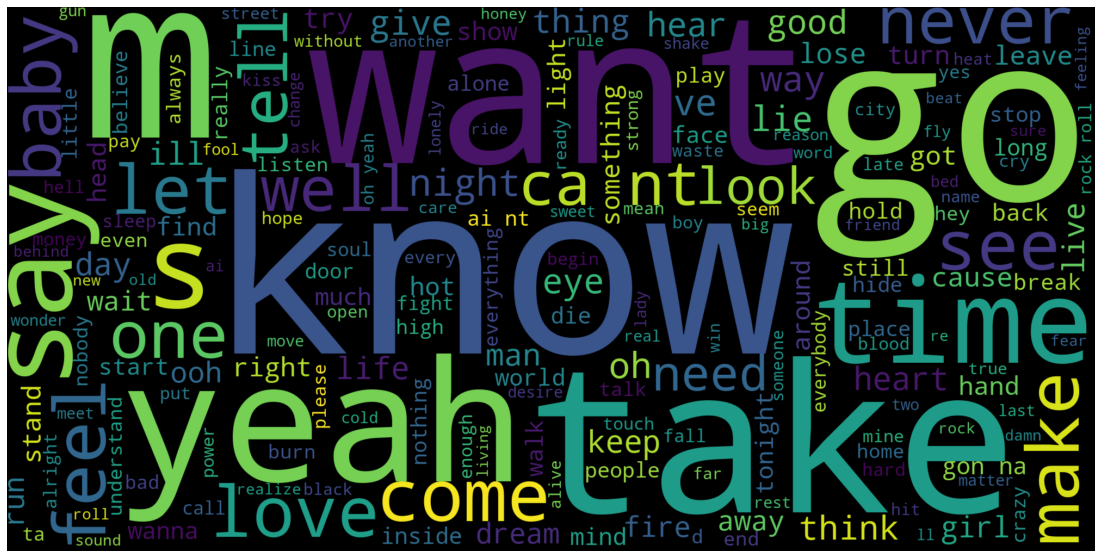

In [21]:
wordcloud = wc(background_color="black", width=2000, height=1000).generate(allWords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
toDrop = ['Symphony: Alive IV','MTV Unplugged','Alive III','Music From "The Elder" (Remastered Version)',\
         'Alive II (Live)','Love Gun (Deluxe Edition)', 'Alive!','Destroyer (Resurrected)']
for item in toDrop:
    dropIndicies = spotify_df[(spotify_df['album'] == item)].index
    spotify_df.drop(dropIndicies , inplace=True)

In [ ]:
spotify_df.sort_values(by=['release_date'], inplace=True, ignore_index=True)

In [ ]:
# Spotify is missing Sonic Boom - 2009!
len(spotify_df['album'].unique())

In [ ]:
track_features = pd.DataFrame(spotify_df[['duration_ms','popularity','danceability','energy','key','loudness','mode',\
                           'speechiness','acousticness','instrumentalness','liveness','valence',\
                           'tempo','time_signature']])

In [ ]:
track_features

In [ ]:
# Track feature stats
display(np.round(track_features.describe()))

In [ ]:
# Track feature correlations and heatmap
correlation = track_features.corr()
display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")